<a href="https://colab.research.google.com/github/chungimungi/Color-prediction/blob/main/color_gen_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras numpy
!pip install matplotlib
!pip install seaborn

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, SimpleRNN, GRU, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt

np.random.seed(10)
data = pd.read_csv('colors.csv')
names = data["name"]

maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = sequence.pad_sequences(tokenized, maxlen=maxlen)

def scale(n):
    return int(n * 255)

normalized_values = np.column_stack([data["red"], data["green"], data["blue"]])
normalized_values = normalized_values / 255.0

model = Sequential()
model.add(Bidirectional(LSTM(64, activation='tanh'), input_shape=(maxlen, 3)))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dropout(0.2))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

history = model.fit(np.repeat(padded_names[:, :, np.newaxis], 3, axis=-1), normalized_values, epochs=150, batch_size=64, validation_split=0.20)

def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2, 2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = sequence.pad_sequences(tokenized, maxlen=maxlen)
    pred = model.predict(np.repeat(padded[:, :, np.newaxis], 3, axis=-1))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r, g, b)
    plot_rgb(pred)

In [ ]:
model.summary()

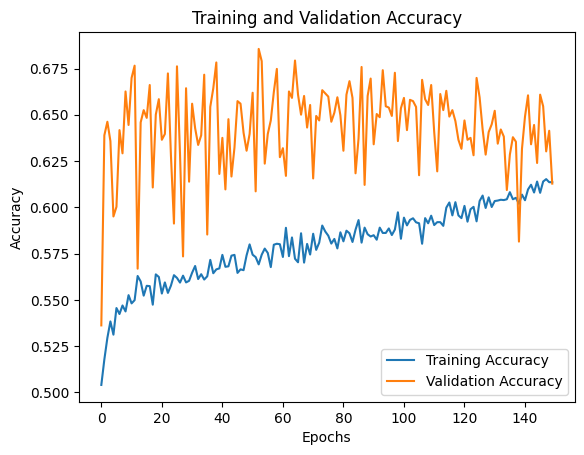

In [16]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<ipython-input-20-51923d5133b3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

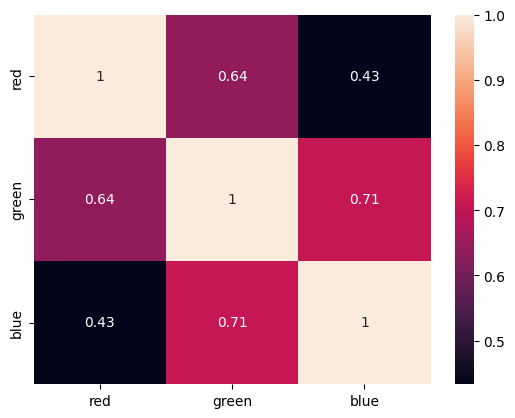

In [20]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, annot=True)

lemon yellow
1/1 [==============================] - 0s 22ms/step
lemon yellow, R,G,B: 213 195 63


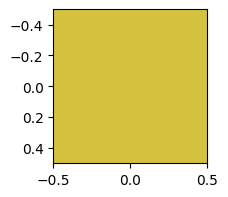

In [28]:
ln = input()
predict(n)